## Decision Tree Regression Model using Boston Housing Dataset

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
###
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  

### Load Data

In [2]:
data = datasets.load_boston() ## loads Boston dataset from datasets library 

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
print(data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

The description of all the features is given below:

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s


### Explore Data

In [6]:
# define the data/predictors as the pre-set feature names  
df_data = pd.DataFrame(data.data, columns=data.feature_names)
# Put the target (housing value -- MEDV) in another DataFrame
df_data['PRICE'] = pd.DataFrame(data.target, columns=["MEDV"])

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [8]:
df_data.shape

(506, 14)

In [9]:
df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Data Preprocessing

In [10]:
df_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

#### There is no missing values in the Dataset.

### Data Visualization

/Users/oindrilasen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


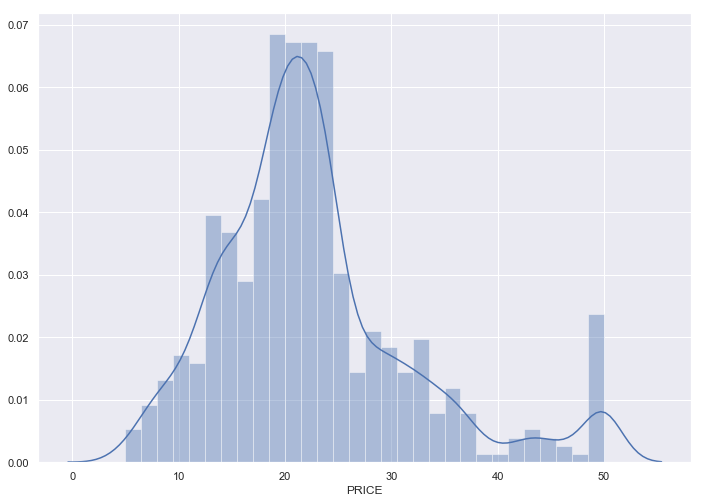

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_data['PRICE'], bins=30)
plt.show()

#### The Price values are Normally Distributed.

#### 1. CRIM VS. PRICE

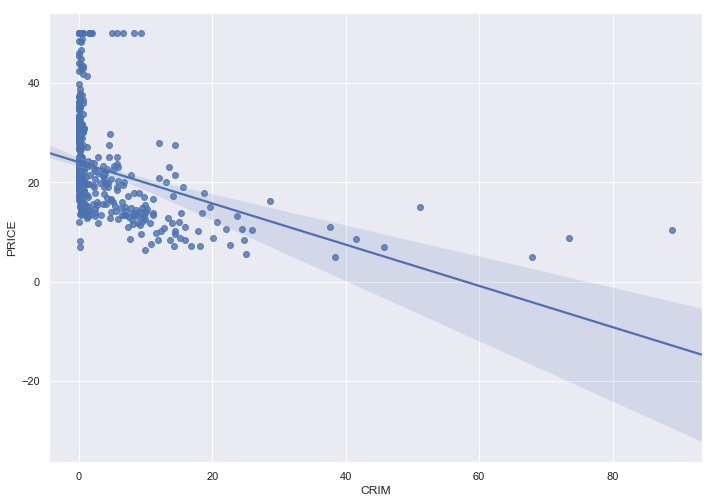

In [12]:
sns.regplot(x="CRIM", y="PRICE", data=df_data)

#### 2. ZN VS. PRICE

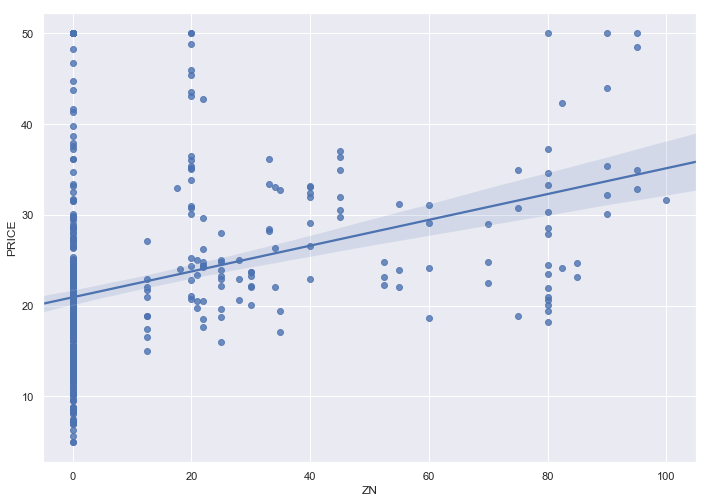

In [13]:
sns.regplot(x="ZN", y="PRICE", data=df_data)

#### 3. INDUS VS. PRICE

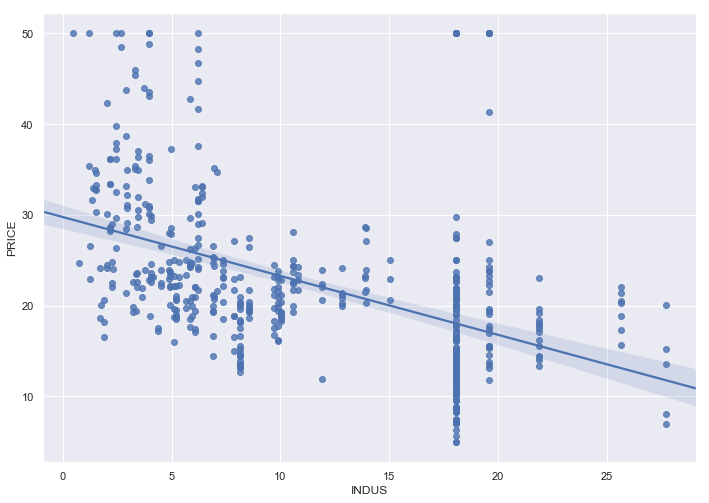

In [14]:
sns.regplot(x="INDUS", y="PRICE", data=df_data)

#### 4. CHAS VS. PRICE

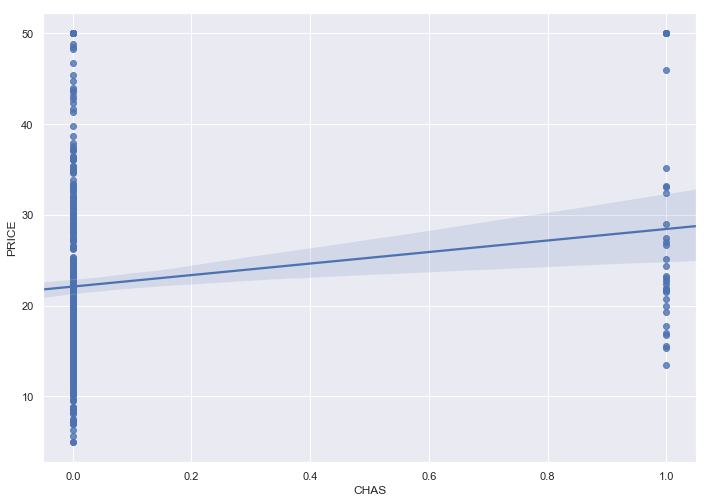

In [15]:
sns.regplot(x="CHAS", y="PRICE", data=df_data)

#### 5. NOX VS. PRICE

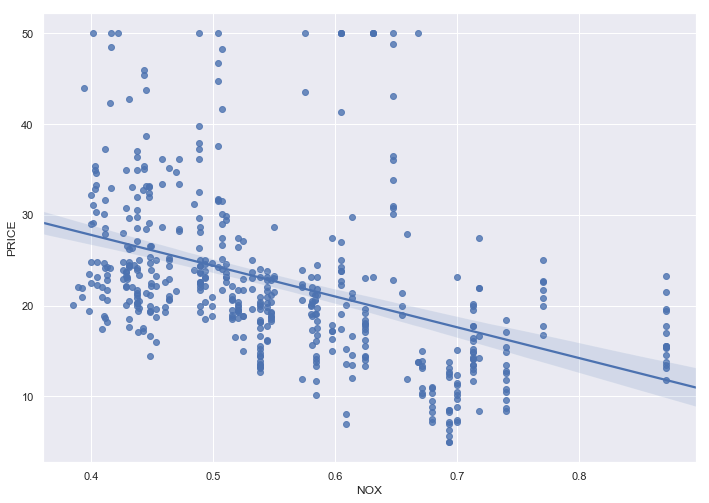

In [16]:
sns.regplot(x="NOX", y="PRICE", data=df_data)

#### 6. RM VS. PRICE

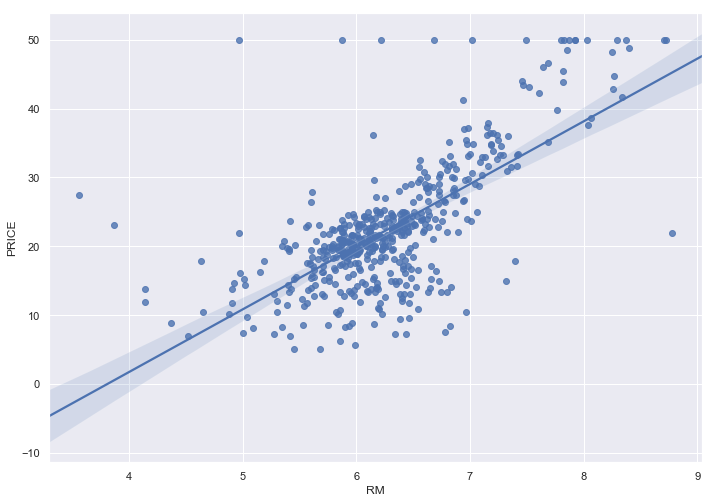

In [17]:
sns.regplot(x="RM", y="PRICE", data=df_data)

#### 7. AGE VS. PRICE

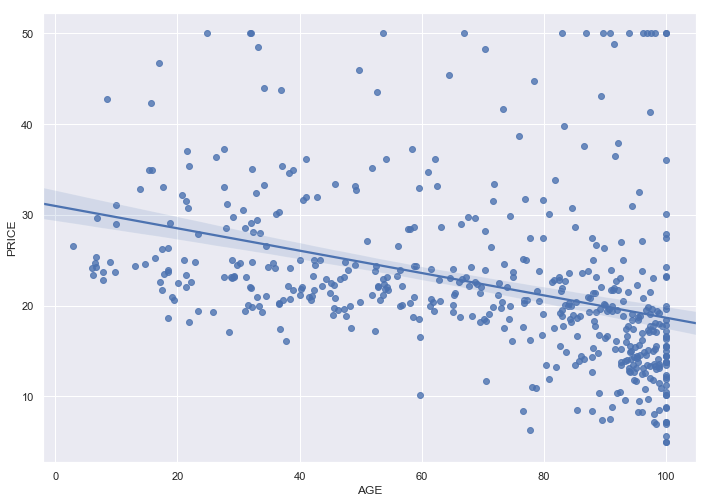

In [18]:
sns.regplot(x="AGE", y="PRICE", data=df_data)

#### 8. DIS VS. PRICE

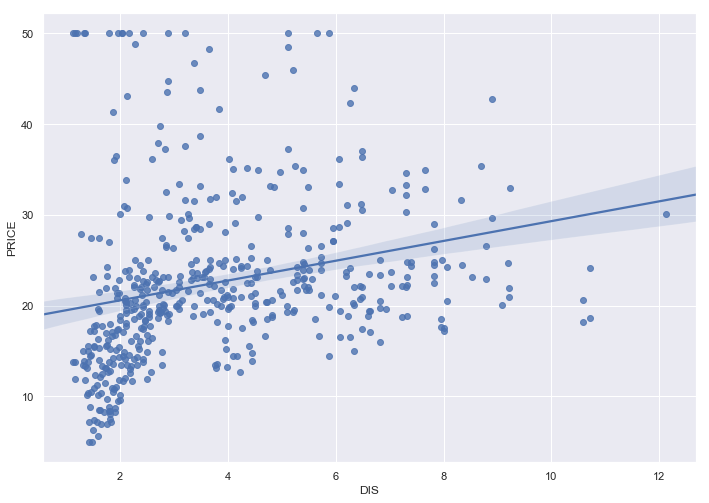

In [19]:
sns.regplot(x="DIS", y="PRICE", data=df_data)

#### 9. RAD VS. PRICE

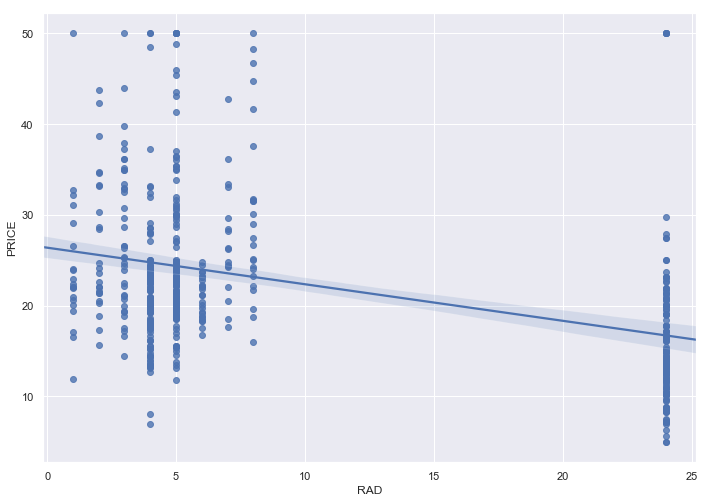

In [20]:
sns.regplot(x="RAD", y="PRICE", data=df_data)

#### 10. TAX VS. PRICE

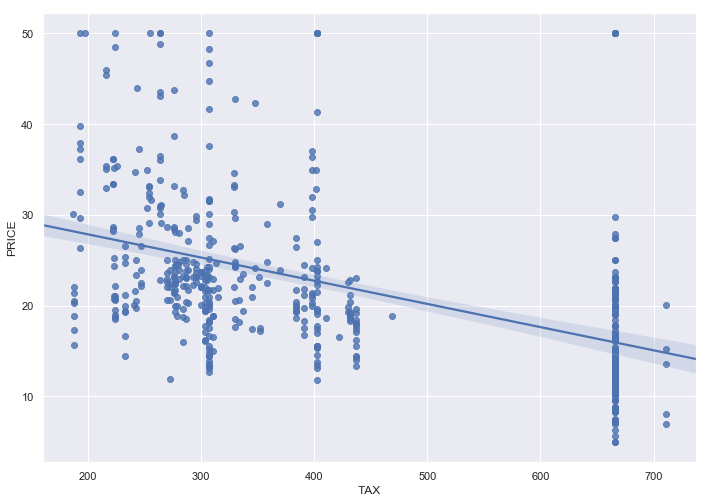

In [21]:
sns.regplot(x="TAX", y="PRICE", data=df_data)

#### 11. PTRATIO VS. PRICE

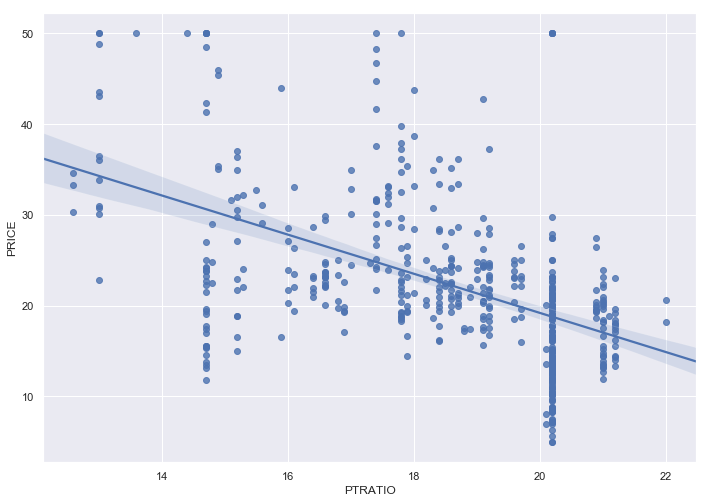

In [22]:
sns.regplot(x="PTRATIO", y="PRICE", data=df_data)

#### 12. B VS. PRICE

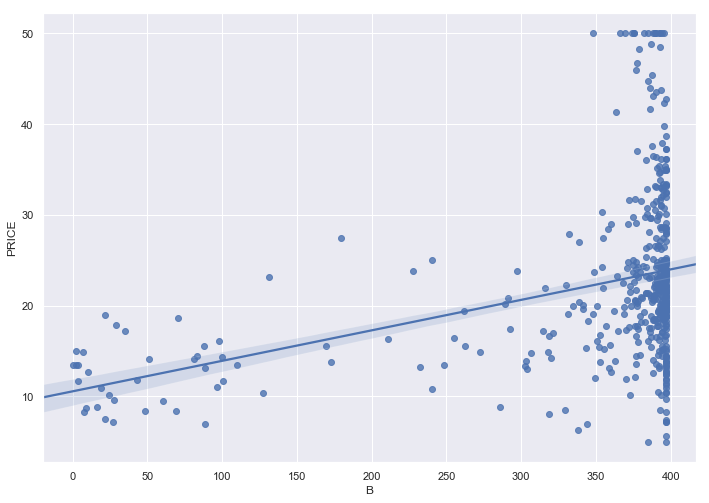

In [23]:
sns.regplot(x="B", y="PRICE", data=df_data)

#### 13. LSTAT VS. PRICE

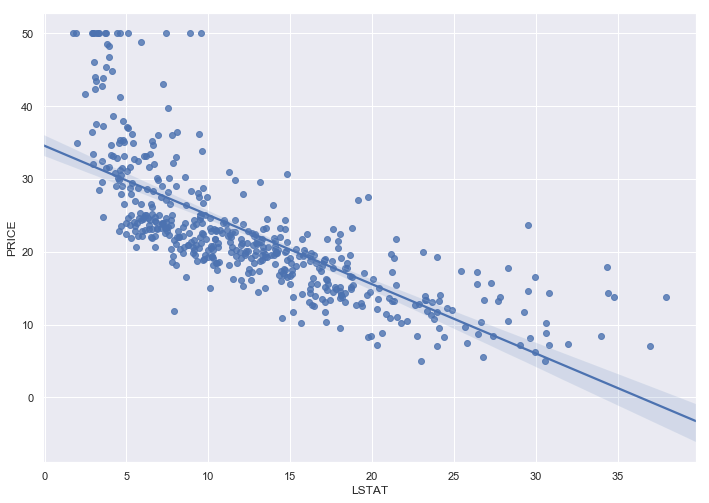

In [24]:
sns.regplot(x="LSTAT", y="PRICE", data=df_data)

#### Corelation Matrix to measure Linear Replations Between Features

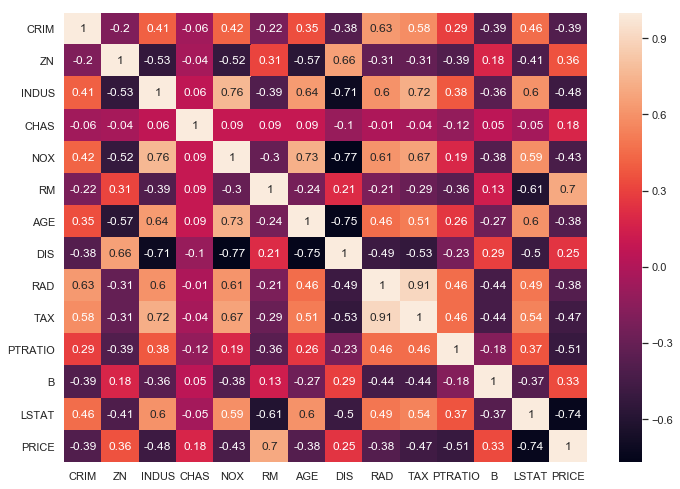

In [25]:
correlation_matrix = df_data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix,annot=True)

The correlation coefficient ranges from -1 to 1.

If the value is close to 1, it means that there is a strong positive correlation between the two variables. 

When it is close to -1, the variables have a strong negative correlation.

**Observation**

RM has a strong positive correlation with PRICE (0.7) and LSTAT has a high negative correlation with PRICE(-0.74). Even the above plots confirm the same.

### Decision Tree Model Using LSTAT

#### Splitting the data into training and testing sets

In [26]:
X = df_data[['LSTAT']]
Y = df_data[['PRICE']]

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 1)
(167, 1)
(339, 1)
(167, 1)


In [28]:
dt = DecisionTreeRegressor(random_state = 0)  
dt.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [29]:
# Prediction for Training set
Y_train_pred = dt.predict(X_train)
# Prediction for Test set
Y_test_pred = dt.predict(X_test)

#### Evaluate the Model

In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))

Mean Absolute Error: 5.971556886227545
Mean Squared Error: 67.29594311377247
Root Mean Squared Error: 8.203410456253696


In [31]:
r2_test = metrics.r2_score(Y_test, Y_test_pred)
print("The decision tree performance for test set: ",r2_test)

The decision tree performance for test set:  0.2821295714169282


### Plot Results for Test Dataset

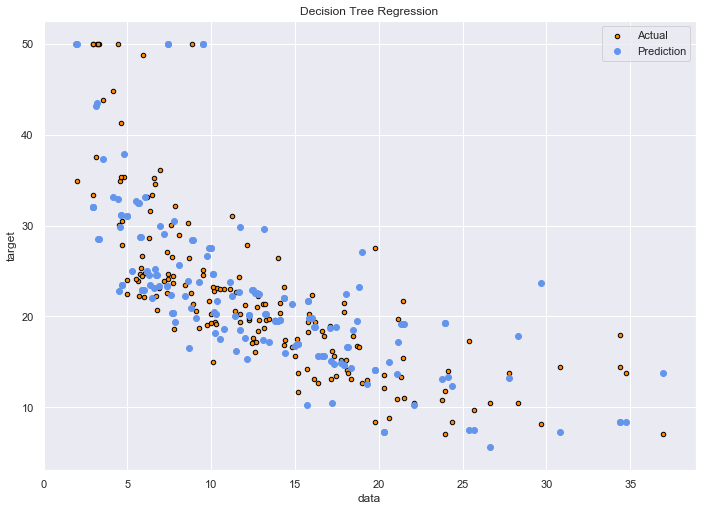

In [32]:
# Plot the results
plt.figure()
plt.scatter(X_test, Y_test, s=20, edgecolor="black", c="darkorange", label="Actual")
plt.scatter(X_test, Y_test_pred, color="cornflowerblue",label="Prediction")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

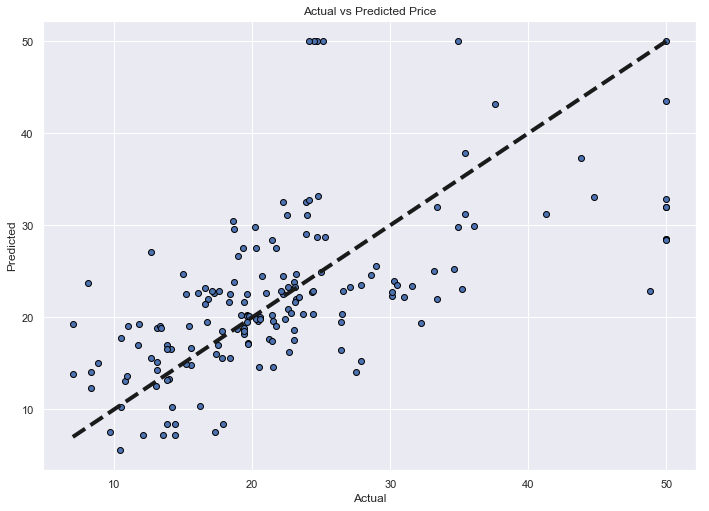

In [33]:
fig, ax = plt.subplots()
ax.scatter(Y_test, Y_test_pred, edgecolors=(0, 0, 0))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted Price")
plt.show()

### Decistion Tree Model using Max_Depth Feature

#### Max_Depth = 2

In [34]:
dt_2 = DecisionTreeRegressor(random_state = 0, max_depth = 2)  
dt_2.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [35]:
# Prediction for Training set
Y_train_pred_2 = dt_2.predict(X_train)
# Prediction for Test set
Y_test_pred_2 = dt_2.predict(X_test)

In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_test_pred_2))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_test_pred_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred_2)))
r2_train = metrics.r2_score(Y_train, Y_train_pred_2)
print("The decision tree model performance for train set: ",r2_train)
r2_test = metrics.r2_score(Y_test, Y_test_pred_2)
print("The decision tree model performance for test set: ",r2_test)

Mean Absolute Error: 4.2250195663224375
Mean Squared Error: 32.86482797000888
Root Mean Squared Error: 5.732785358794526
The decision tree model performance for train set:  0.6385873722945704
The decision tree model performance for test set:  0.649418864666883


#### Max_Depth = 20

In [37]:
dt_20 = DecisionTreeRegressor(random_state = 0, max_depth = 20)  
dt_20.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [38]:
# Prediction for Training set
Y_train_pred_20 = dt_20.predict(X_train)
# Prediction for Test set
Y_test_pred_20 = dt_20.predict(X_test)

In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_test_pred_20))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_test_pred_20))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred_20)))
r2_train = metrics.r2_score(Y_train, Y_train_pred_20)
print("The decision tree model performance for train set: ",r2_train)
r2_test = metrics.r2_score(Y_test, Y_test_pred_20)
print("The decision tree model performance for test set: ",r2_test)

Mean Absolute Error: 5.971556886227545
Mean Squared Error: 67.29594311377247
Root Mean Squared Error: 8.203410456253696
The decision tree model performance for train set:  0.976299332060311
The decision tree model performance for test set:  0.2821295714169282


### Plot the Results

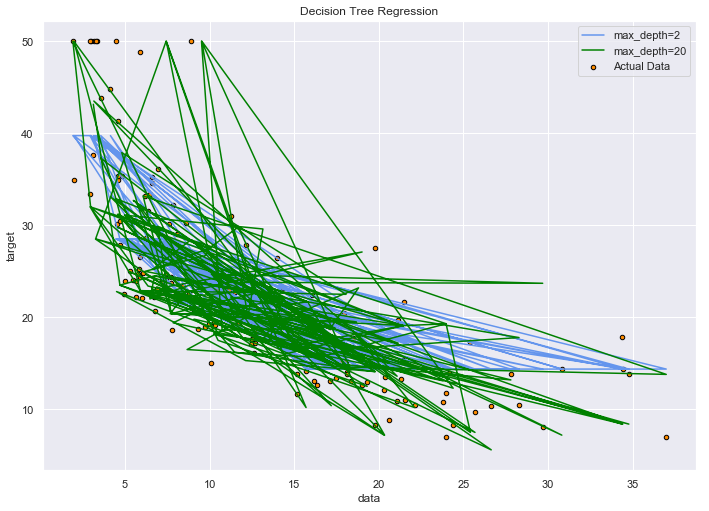

In [40]:
# Plot the results
plt.figure()
plt.scatter(X_test, Y_test, s=20, edgecolor="black", c="darkorange", label="Actual Data")
plt.plot(X_test, Y_test_pred_2, color="cornflowerblue",label="max_depth=2")
plt.plot(X_test, Y_test_pred_20, color="green",label="max_depth=20")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Conclusion:

Decision Trees result in Overfitting if we chane the parameter value of max_depth from 2 to 20. The R2 score is improved to 0.9762 for the training set. But for the test set, the R2 score is decresed to 0.28.  